# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/soroushghaderi/chocolate-bar-2020

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [20]:
#import needed libraires with aliases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#read in dataset
df = pd.read_csv("chocolate.csv")

# Want to see if the dataframe was properly imported and see what kind of data is stored in each column.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2224 non-null   int64  
 1   ref                               2224 non-null   int64  
 2   company                           2224 non-null   object 
 3   company_location                  2224 non-null   object 
 4   review_date                       2224 non-null   int64  
 5   country_of_bean_origin            2224 non-null   object 
 6   specific_bean_origin_or_bar_name  2224 non-null   object 
 7   cocoa_percent                     2224 non-null   float64
 8   rating                            2224 non-null   float64
 9   counts_of_ingredients             2224 non-null   int64  
 10  beans                             2224 non-null   object 
 11  cocoa_butter                      2224 non-null   object 
 12  vanill

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [6]:
#check how complete data is
#note that not all chocolate has more than one taste find this interesting, might make cool visualizations.
df.isna().sum()

Unnamed: 0                             0
ref                                    0
company                                0
company_location                       0
review_date                            0
country_of_bean_origin                 0
specific_bean_origin_or_bar_name       0
cocoa_percent                          0
rating                                 0
counts_of_ingredients                  0
beans                                  0
cocoa_butter                           0
vanilla                                0
lecithin                               0
salt                                   0
sugar                                  0
sweetener_without_sugar                0
first_taste                            0
second_taste                          77
third_taste                          620
fourth_taste                        1982
dtype: int64

In [10]:
# summary statistics
df.describe()

,Unnamed: 0,ref,review_date,cocoa_percent,rating,counts_of_ingredients
count,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000
mean,1111.500000,1337.010342,2013.857914,71.493930,3.198561,3.075989
std,642.157821,693.959768,3.582151,5.278253,0.434329,0.929875
min,0.000000,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,555.750000,776.000000,2011.000000,70.000000,3.000000,2.000000
50%,1111.500000,1381.000000,2014.000000,70.000000,3.250000,3.000000
75%,1667.250000,1928.000000,2016.000000,74.000000,3.500000,4.000000
max,2223.000000,2490.000000,2020.000000,100.000000,4.000000,6.000000


In [7]:
# List all column names
df.columns

Index(['Unnamed: 0', 'ref', 'company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'rating', 'counts_of_ingredients', 'beans',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar', 'first_taste', 'second_taste', 'third_taste',
       'fourth_taste'],
      dtype='object')

In [9]:
# Look at the ratings breakdown
df.rating.value_counts()

3.50    489
3.00    471
3.25    394
2.75    304
3.75    265
2.50    149
4.00    101
2.00     29
2.25     14
1.50      5
2.60      1
1.00      1
1.75      1
Name: rating, dtype: int64

*NOTE Thinking 2.60 is an error in data entry as they increase by .25 according to the write up with the dataset on Kaggle.

In [5]:
# Look at how many have coco_butter
df.cocoa_butter.value_counts()

have_cocoa_butter        1535
have_not_cocoa_butter     689
Name: cocoa_butter, dtype: int64

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

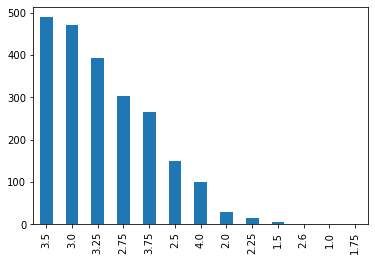

In [27]:
# bar chart ratings - Notice that most chocolate is rated above a 3
df['rating'].value_counts().plot(kind='bar');

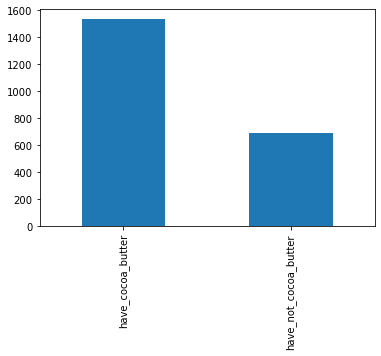

In [29]:
# bar chart cocoa_butter, about a third don't use cocoa butter find this interesting
df['cocoa_butter'].value_counts().plot(kind='bar');

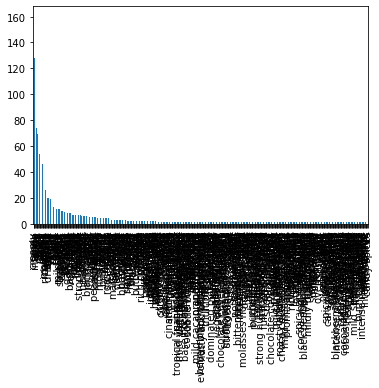

In [28]:
#Note that the below bar graph for the column first_taste is hard to read, 
#but might work great as a word cloud
df['first_taste'].value_counts().plot(kind='bar');

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 

The fact that they did not use 1 and 0 for if a bar included an ingredient or not, curious as to why they made that choice when entering the data.  Also has anyone else noticed the 2.60 data entry error.

2. Do you have any concerns about your dataset? 

No

3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

Yes - Want to replace the ingredient columns(cocoa_butter, vanilla, lecithin, salt, sugar, sweetener_without_sugar) with 1 for have ingredient and 0 have not ingredient.  

Fix the 2.60 rating to 2.5

Create word clouds for the tasting notes.